## Problem Statement 1: Prepare a model for glass classification using KNN

#### Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
glass_df = pd.read_csv('glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#####  Columns Description

RI : refractive index

Na : Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg : Magnesium

AI : Aluminum

Si : Silicon

K : Potassium

Ca : Calcium

Ba : Barium

Fe : Iron

Type : Type of glass : (class attribute)

1 -- building_windows_float_processed

2 -- building_windows_non_float_processed

3 -- vehicle_windows_float_processed

4 -- vehicle_windows_non_float_processed (none in this database)

5 -- containers

6 -- tableware

7 -- headlamps

#### EDA 

In [4]:
glass_df.shape

(214, 10)

In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
glass_df.duplicated().sum()

1

In [8]:
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [10]:
glass_df.drop_duplicates(inplace=True)

In [11]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
glass_df["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [13]:
glass_df['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

#### Outliers Detection

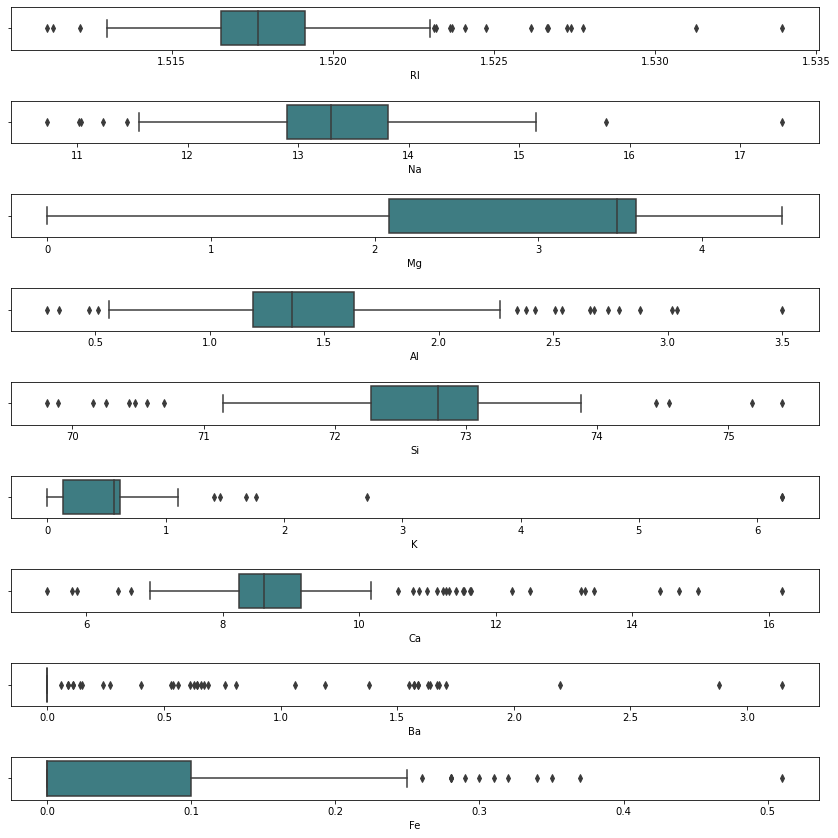

In [14]:
outlier = glass_df.copy() 
fig, axes=plt.subplots(9,1,figsize=(12,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=outlier,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

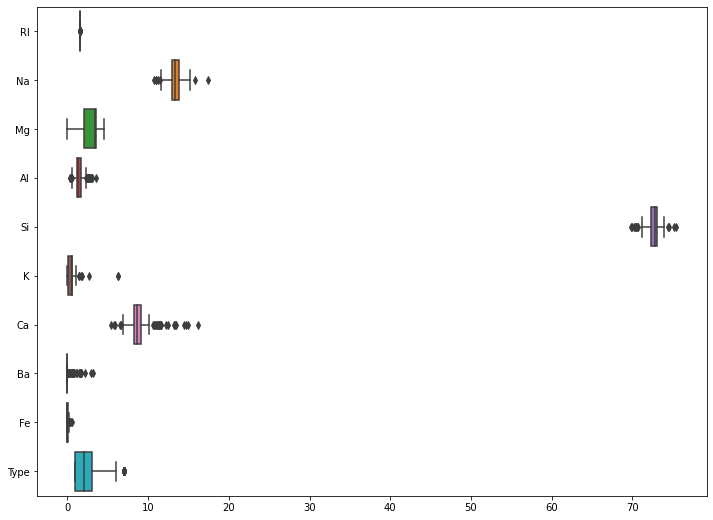

In [15]:
plt.figure(figsize=(12,9))
sns.boxplot(data=glass_df, orient="h");

- since glass in made of silica..it is used more. Therefore mean(silica)>other elements

##### Multivariate Analysis

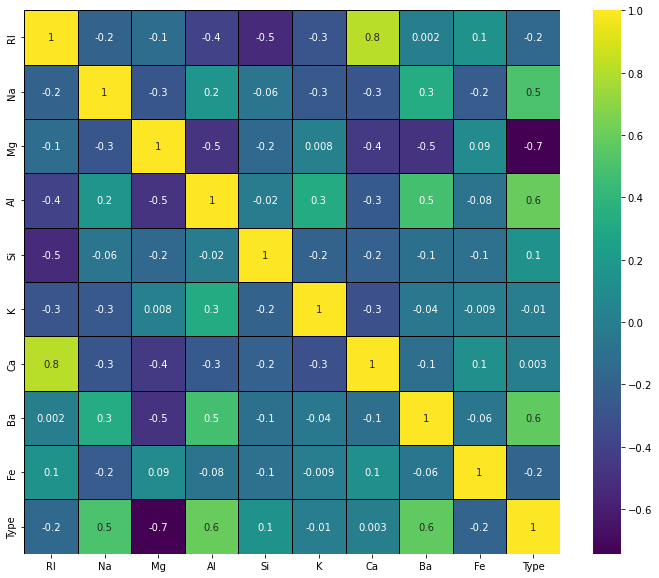

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(glass_df.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black');

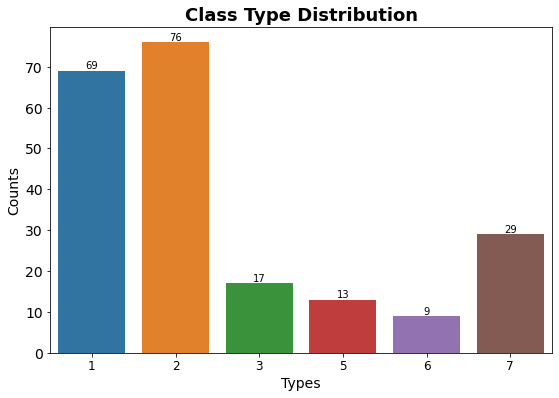

In [17]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = glass_df['Type'].value_counts().index.tolist(), y = glass_df['Type'].value_counts().tolist())
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
for i in ax.containers:
    ax.bar_label(i,)

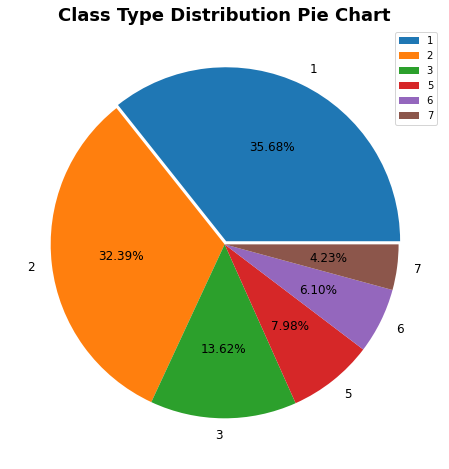

In [18]:
plt.figure(figsize = (8,8))
plt.pie(glass_df['Type'].value_counts(),
       labels=glass_df.Type.unique(), explode = [0.02,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size':'large'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()


##### Data Pre-Processing

#### Removing multiple outliers

In [19]:
# Detect observations with more than one outlier
features = glass_df.columns[:-1].tolist()
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25) # 1st quartile (25%)
        Q3 = np.percentile(df[col],75) # 3rd quartile (75%)
        IQR = Q3 - Q1 # Interquartile rrange (IQR)
        outlier_step = 1.5 * IQR # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass_df[features])))) 

The dataset contains 14 observations with more than 2 outliers


In [20]:
outlier_indices = outlier_hunt(glass_df[features])
df = glass_df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


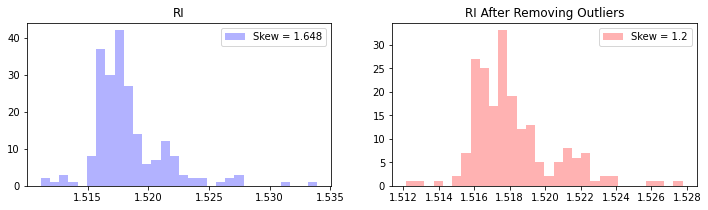

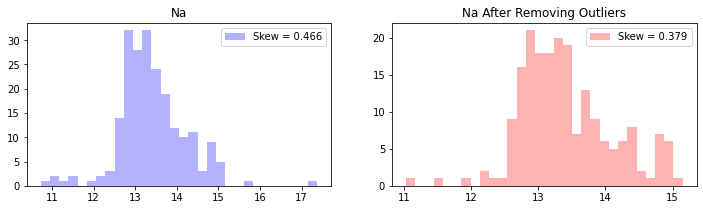

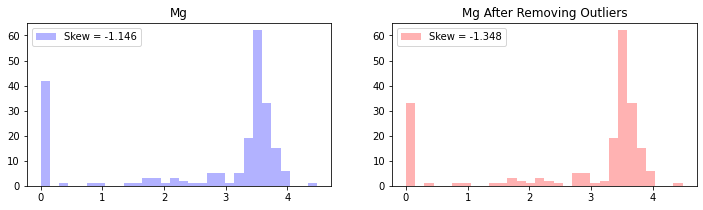

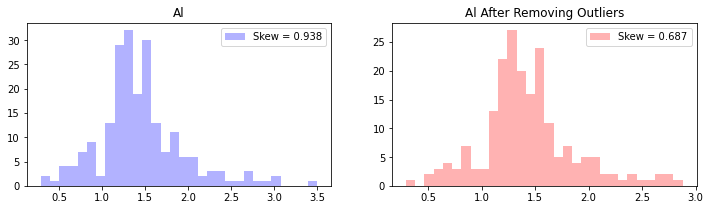

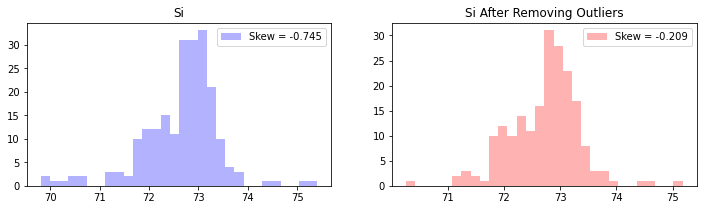

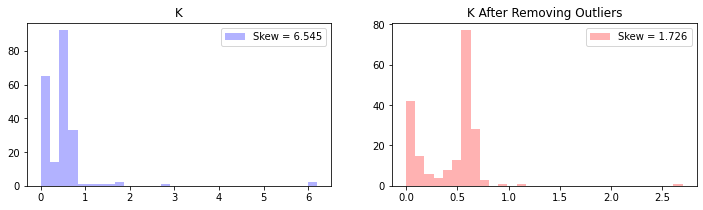

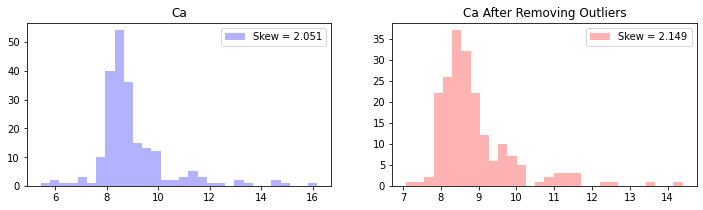

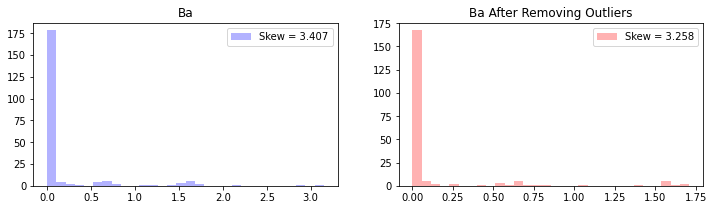

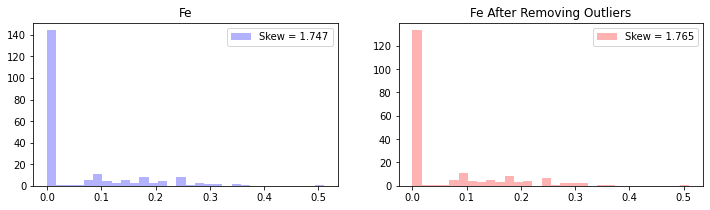

In [21]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(12,3))    
    ax[0].hist(glass_df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glass_df[feature].skew(),3))))
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    
    ax[1].hist(df[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))))
    ax[1].set_title(str(feature)+' After Removing Outliers')
    ax[1].legend(loc=0)
    plt.show()

#### Test Train Split

In [22]:
X = df.drop('Type',axis=1)
y = df[['Type']]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (159, 9)
Shape of X_test  :  (40, 9)
Shape of y_train :  (159, 1)
Shape of y_test  :  (40, 1)


#### Stardardization 

In [25]:
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#### Grid search for choosing the best Value of K

In [26]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(40,1)
    score = cross_val_score(knn,X_train, y_train,cv= 10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [27]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [28]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.6634210526315789
{'n_neighbors': 3}


#### Visualizing the CV results

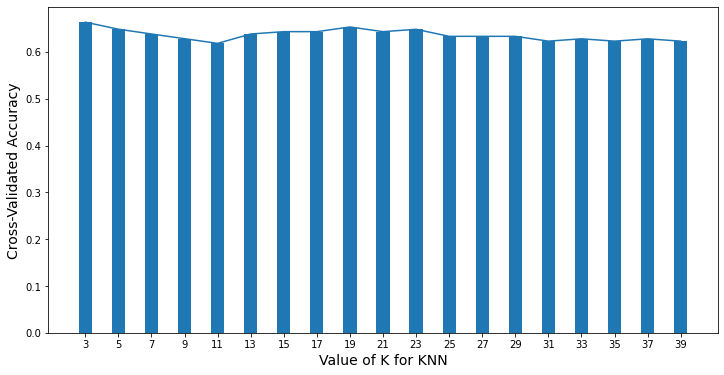

In [30]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())

plt.figure(figsize=(12,6))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 14)
plt.ylabel('Cross-Validated Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

In [31]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.663421
8,0.653158
1,0.648421
10,0.648158
6,0.643158
7,0.643158
9,0.643158
5,0.638158
2,0.638158
11,0.633158


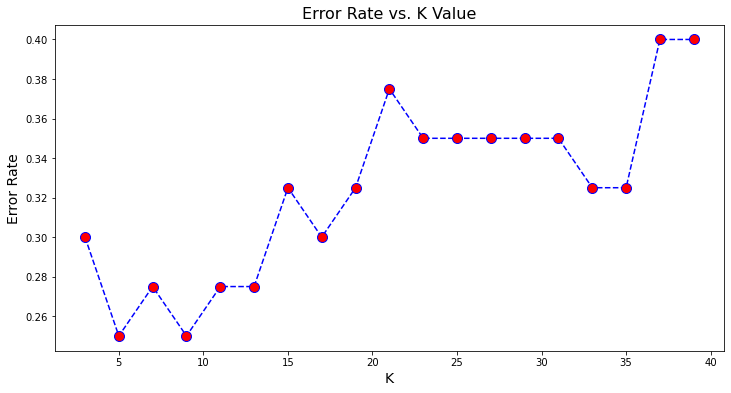

In [32]:
error_rate = []
k_range = [i for i in range(3,40, 2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(40,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot([i for i in range(3,40,2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

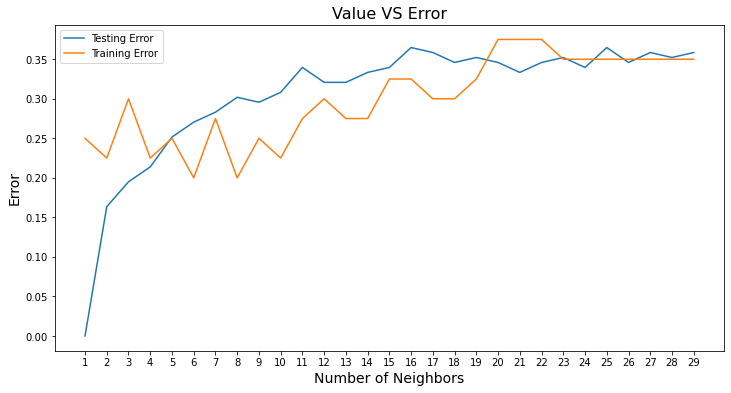

In [33]:
error1= []
error2= []
k_range = [i for i in range(1,30)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    y_pred1 = y_pred1.reshape(159,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    y_pred2 = y_pred2.reshape(40,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[12,6])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('Value VS Error', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(k_range)
plt.show()

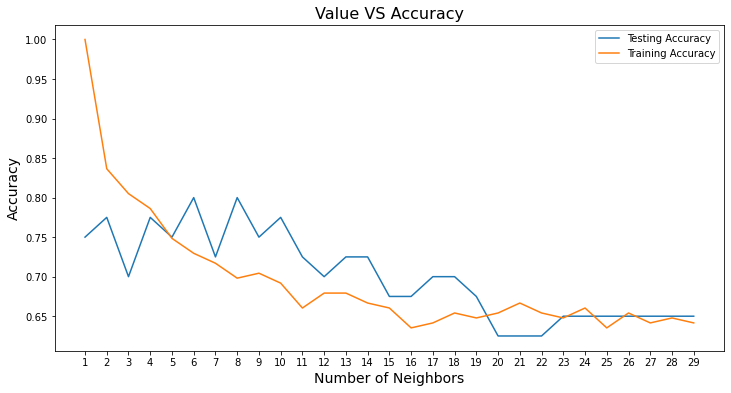

In [34]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

#### Applying KNN

#### Using K=3

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[10  4  0  0  0  0]
 [ 3  8  0  1  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.62      0.71      0.67        14
           2       0.62      0.67      0.64        12
           3       0.00      0.00      0.00         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.70        40
   macro avg       0.67      0.69      0.68        40
weighted avg       0.65      0.70      0.68        40



##### Using K=5 

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[12  2  0  0  0  0]
 [ 3  9  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.75        40
   macro avg       0.73      0.68      0.69        40
weighted avg       0.72      0.75      0.72        40



In [37]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [38]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [39]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 0.7861635220125787
Testing Accuracy  : 0.7


<b>Conclusion
- The accuracy of KNN models was greater for every value where K = 3

## Problem statement 2- Implement a KNN model to classify the animals into categories

#### Load dataset 

In [40]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


#### EDA 

In [41]:
zoo.shape

(101, 18)

In [42]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [43]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [44]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [45]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [46]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

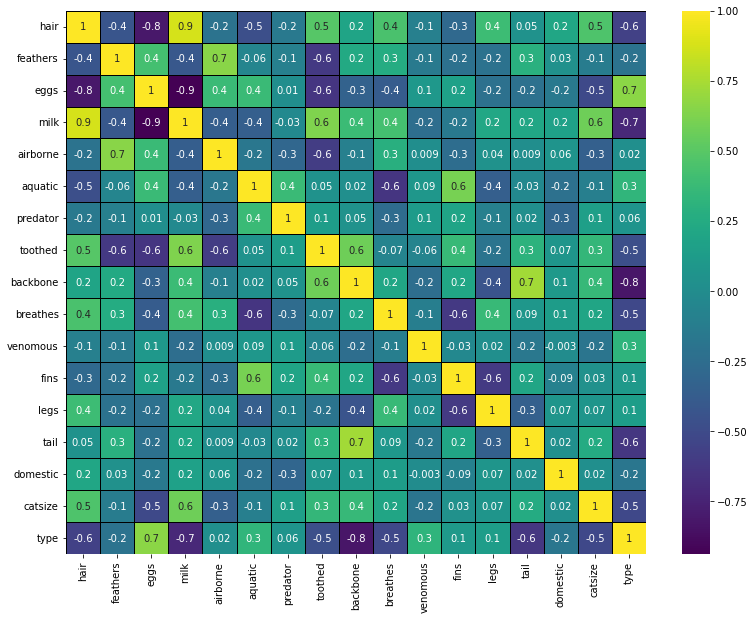

In [47]:
#correlationmatrix
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black');

In [48]:
zoo_df = zoo.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df = zoo_df[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','tail', 'domestic','catsize','type']]
zoo_df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


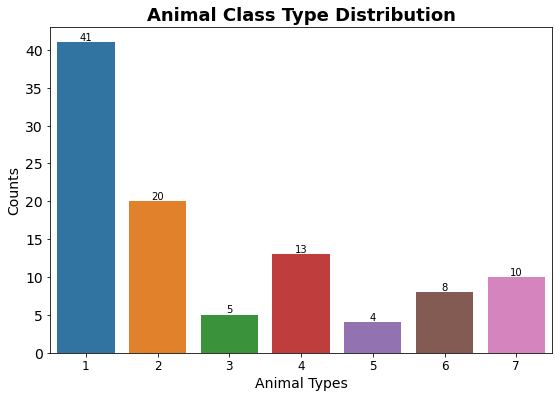

In [49]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist())
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
for i in ax.containers:
    ax.bar_label(i,)

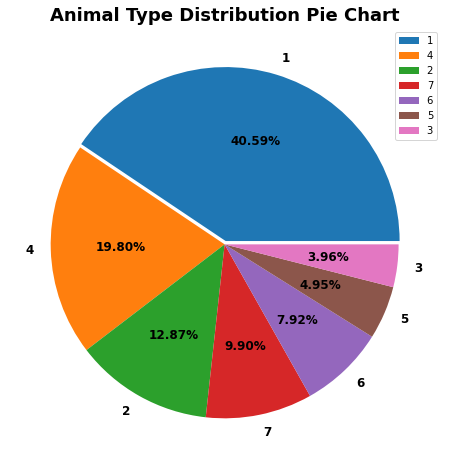

In [50]:
plt.figure(figsize = (8,8))
plt.pie(zoo['type'].value_counts(), labels=zoo.type.unique(),
        explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0], autopct= '%.2f%%',
        textprops = {'size':'large', 'fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Animal Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

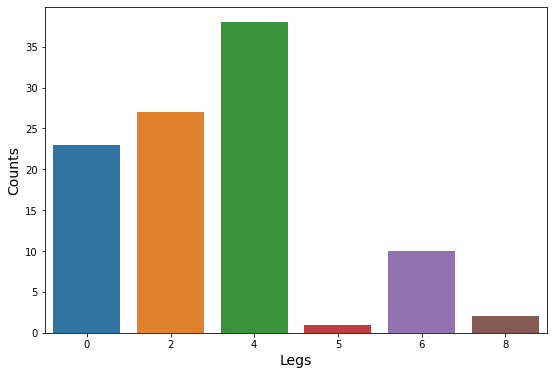

In [51]:
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(zoo["legs"])
plt.xlabel('Legs',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
plt.show()

<b> Observations:
    
 - Most animals have 4 legs

#### Data Pre-Processing 

In [52]:
zoo = zoo.drop(["animal name"], axis= 1)
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Train Test Split

In [53]:
X = zoo.drop('type',axis=1)
y = zoo[['type']]

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 13)

In [55]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (80, 16)
Shape of X_test  :  (21, 16)
Shape of y_train :  (80, 1)
Shape of y_test  :  (21, 1)


#### Standardization

In [56]:
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

####  Grid search for choosing the best Value of K

In [57]:
# Get score for different values of n
k_list = np.arange(1, 21, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(21,1)
    score = cross_val_score(knn,X_train, y_train,cv= 10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [58]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [59]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [60]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


#### Visualizing the CV results

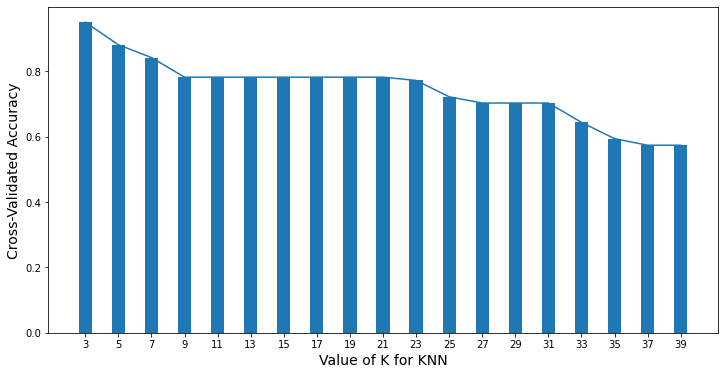

In [61]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())

plt.figure(figsize=(12,6))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 14)
plt.ylabel('Cross-Validated Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

In [62]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


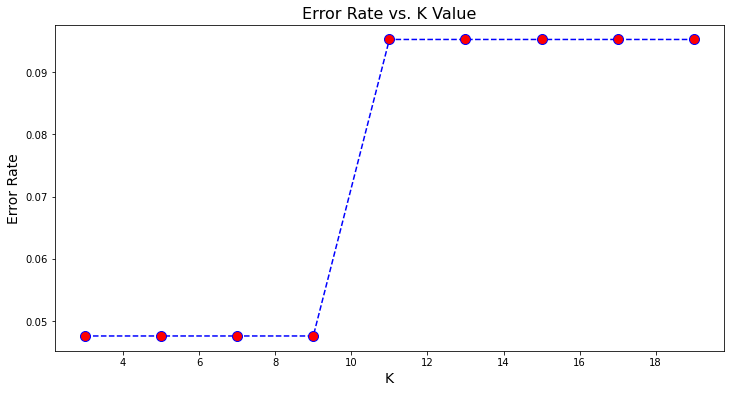

In [63]:
error_rate = []
k_range = [i for i in range(3,21,2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(21,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot([i for i in range(3,21,2)],error_rate,color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value',fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

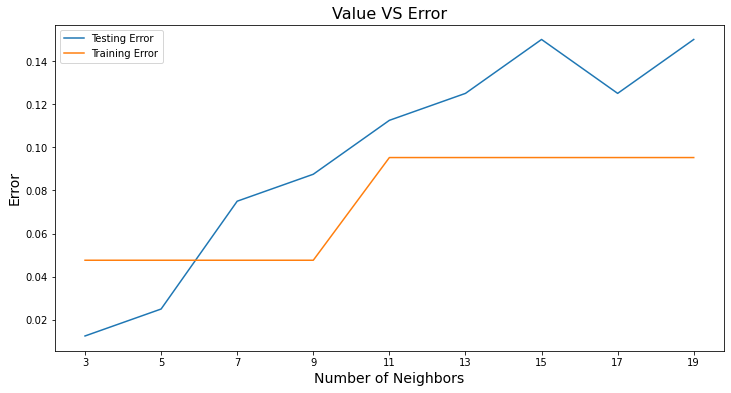

In [64]:
error1= []
error2= []
k_range = [i for i in range(3,21,2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    y_pred1 = y_pred1.reshape(80,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    y_pred2 = y_pred2.reshape(21,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[12,6])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('Value VS Error', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(k_range)
plt.show()


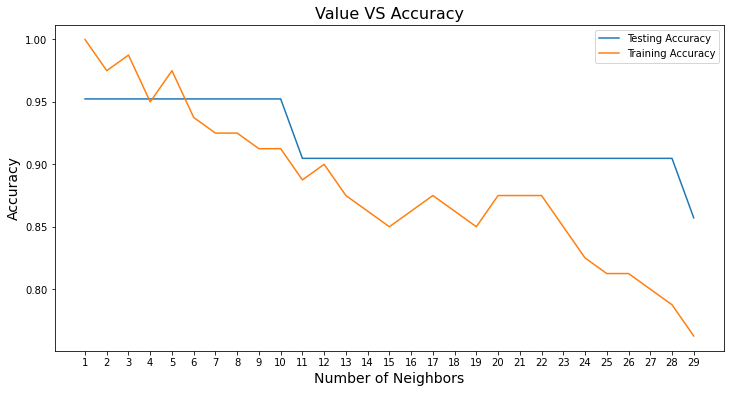

In [65]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize = 16)
plt.xlabel('Number of Neighbors',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)
plt.xticks(k_range)
plt.show()


#### KNN

#### Using K=3

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



#### Using K=5

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



In [69]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [70]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [71]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 1.0
Testing Accuracy  : 0.9523809523809523


<b> Observations
- K=3 gives best accuracy